循环神经网络(recurrent neural network,RNN)源自于1982年由Saratha Sathasivam提出的霍普菲尔德网络。随着更有效的循环神经网络被提出，循环神经网络挖掘数据中的时序信息和语义信息的深度表达能力被充分利用，并在语音识别、语言模型、机器翻译以及时序分析等方面有重大突破。<br/>
循环神经网络主要用途是处理和预测时序数据。从网络结构上，循环神经网络会记忆之前的信息，并利用之前的信息影响后面节点的输出。也就是说，循环神经网络隐藏层的节点是有连接的，隐藏层的输入不仅包括输入层的输出，还包括上一时刻隐藏层的输出。<br/>
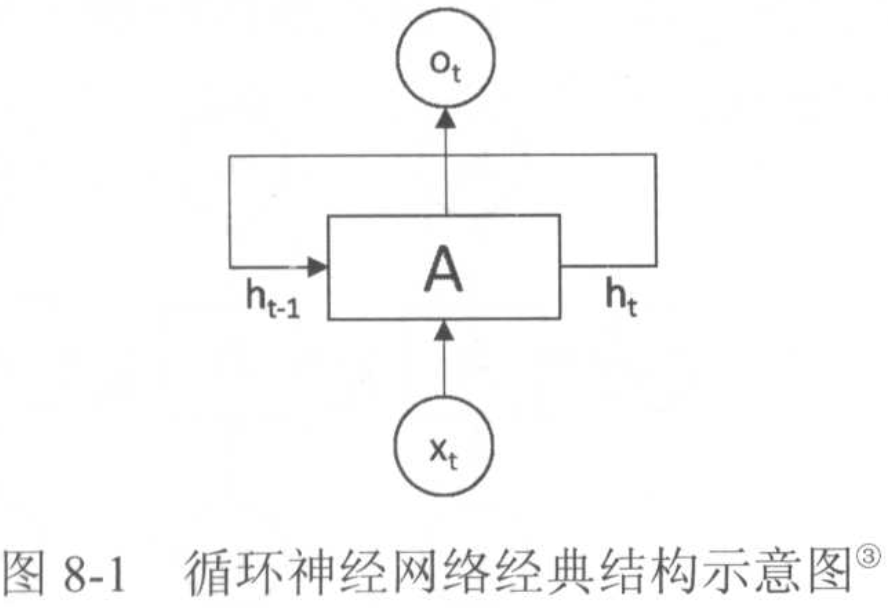
循环神经网络的的主体结构A的输入除了来自输入层$x_t$，还有来自上一时刻的隐藏层状态$h_{t-1}$。在每个时刻，循环神经网络都会读取$x_t$和$h_{t-1}$来生成新的隐藏状态$h_t$，并产生本时刻的输出$o_t$。由于模块A中的运算和变量在不同时刻是相同的，因此循环神经网络理论上可以被看作是同一神经网络被无限复制的结果。正如卷积网络在不同空间共享参数，循环神经网络在不同时间位置共享参数，从而能够使用有限参数处理任意长度的序列。<br/>

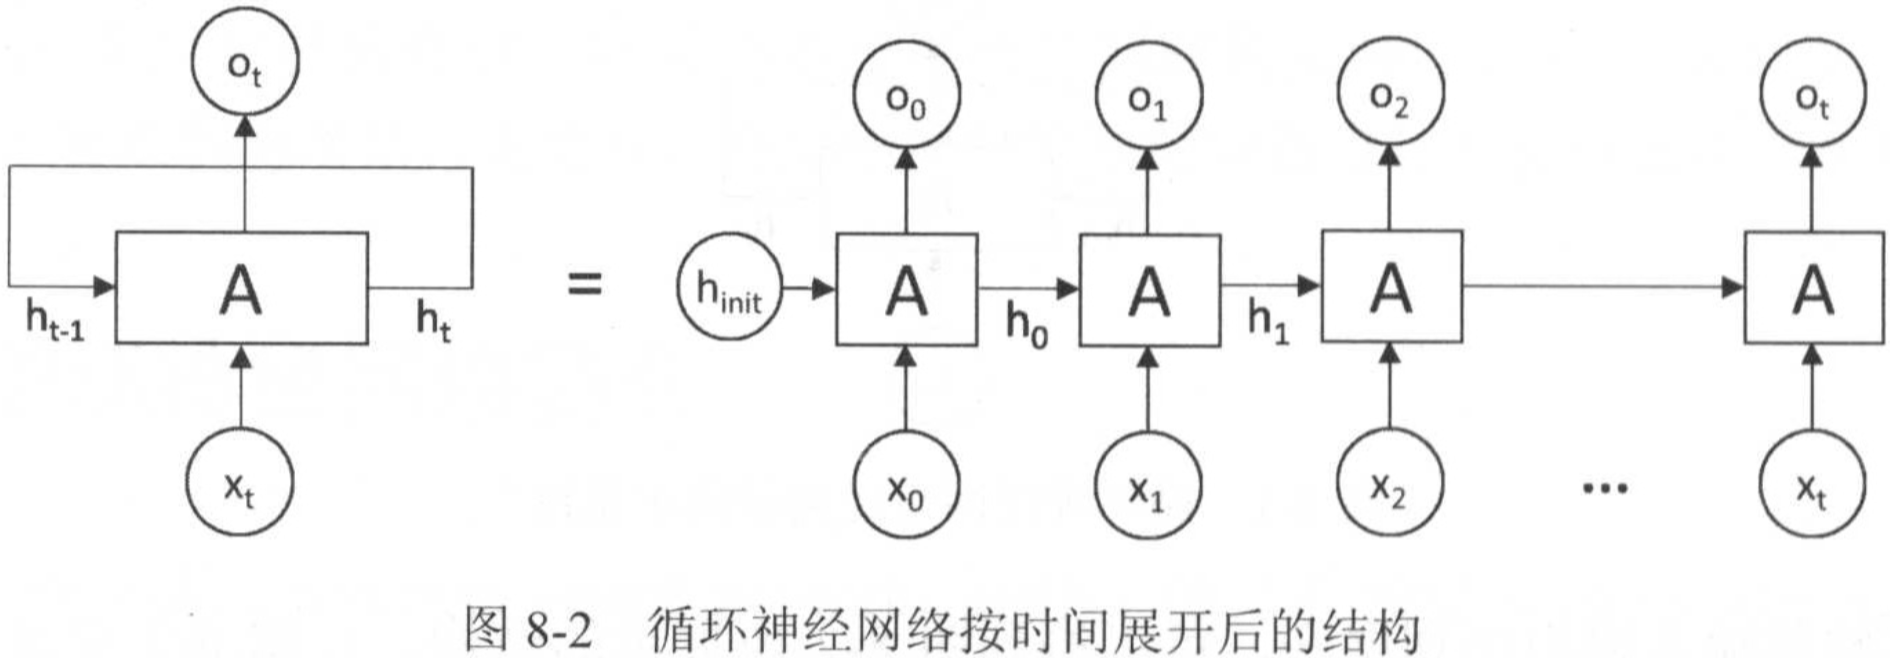
将完整的输入输出序列展开，可以得到上图的结构。可以看到循环神经网络在每一个时刻会有一个输入$x_i$，然后根据循环神经网络前一时刻的状态$h_{t-1}$计算新的状态$h_t$，并输出$o_t$。循环神经网络当前的状态$h_t$是根据上一时刻的状态$h_{t-1}$和当前的输入$x_t$共同决定的。在时刻t，状态$h_{t-1}$浓缩了前面序列$x_1, x_2, \cdots, x_{t-1}$的信息，用于作为输出$o_t$的参考。由于序列的长度可以无限，维度有限的h状态不可能记录序列的全部信息，因此模型必须学习只保留与后面任务$o_t, o_{t+1}, \cdots$相关的重要信息。<br/>
循环神经网络对长度为$N$的序列展开之后，可以视为一个有N个中间层的前馈网络。这个前馈神经网络没有循环链接，因此可以直接使用反向传播算法进行训练，而不需要任何特殊的优化算法。这样的训练方法被称为`Back-Propagation Through Time`，是训练循环神经网络最常见的方法。<br/>
从循环神经网络的结构特征可以看出它擅长解决与时间序列相关的问题。对于一个序列数据，可以将这个序列上不同时刻的数据一次传入循环神经网络的输入层，而输出可以是序列中下一时刻的预测，也可以是对当前信息的处理结果。循环神经网络要求每一个时刻都有一个输入，但是不一定每个时刻都需要有输出。<br/>

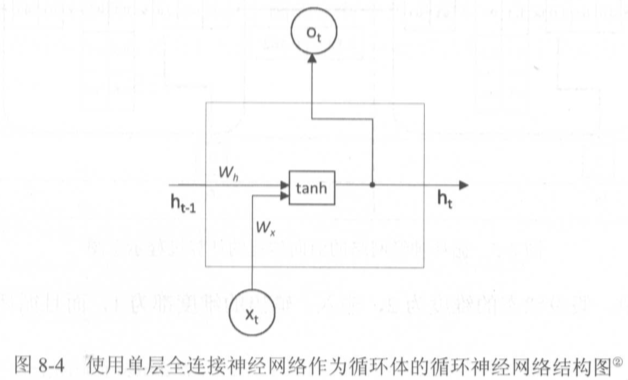
上面是最简单的循环体结构。循环神经网络中的状态是通过一个向量来表示的，这个向量的维度也称为循环神经网络隐藏层的大小，假设其为$n$。从图可以看出，循环体中的神经网络的输入有两部分，一部分为上一时刻的状态，另一部分为当前时刻的输入样本。<br/>
假设输入向量的维度为$x$，隐藏状态的维度为$n$，那么循环体的全连接层神经网络的输入大小为$n+x$。也就是将上一时刻的状态与当前时刻的输入拼接成一个大的向量作为循环体中神经网络的输入。因为该全连接层的输出为当前时刻的状态，于是输出层的节点个数也为$n$，循环体中的参数个数为$(n+x)\times n + n$个。循环体中的神经网络输出不但提供给了下一时刻作为状态，同时也会提供给当前时刻的输出。

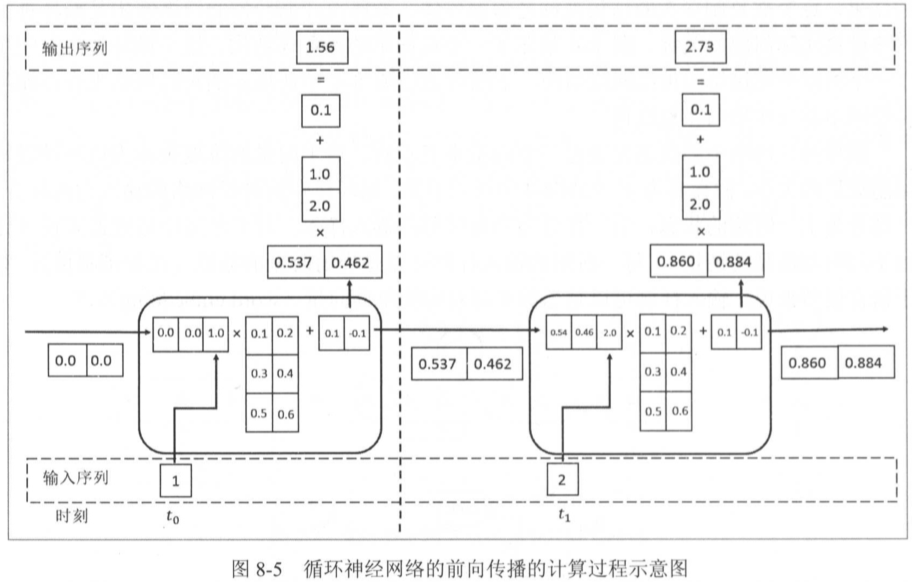
假设状态的维度为2，输入、输出的维度都为1，而且循环体中的全连接层中的权重为：
$$
w_{rnn} = \begin{bmatrix}
    0.1 & 0.2 \\
    0.3 & 0.4 \\
    0.5 & 0.6 \\
    \end{bmatrix}
$$
偏置项的大小为$b_{rnn} = [0.1, -0.1]$，用于输出的全连接层权重为：
$$
w_{output} = \begin{bmatrix}
    1.0 \\
    2.0 \\
    \end{bmatrix}
$$
偏置项大小为$b_{output}=0.1$。在$t_0$时刻，状态初始化为$h_{init}=[0,0]$，而当前的输入为1，所以拼接得到的向量为$[0,0,1]$，通过循环体中的全连接层神经网络得到的结果为：
$$
tanh([0,0,1]\times \begin{bmatrix}0.1 & 0.2 \\0.3 & 0.4 \\0.5 & 0.6 \\\end{bmatrix} + [0.1, -0.1]) = tanh([0.6, 0.5]) = [0.537, 0.462]
$$
这个结果作为下一时刻的输入状态，同时循环申神经网络也会使用该状态生成输入出，将该向量作为输入提供给用于输出的全连接神经网络可以得到$t_0$时刻的最终输出：
$$
[0.537, 0.462] \times \begin{bmatrix}1.0 \\2.0 \\ \end{bmatrix} + 0.1 = 1.56
$$
使用$t_0$时刻的状态可以类似地推导出$t_1$时刻的状态为$[0.860,0.884]$，而$t_1$时刻的输出为$2.73$。在得到循环神经网络的前向传播结果之后，可以和其他神经网络类似的定义损失函数。`循环神经网络唯一的区别在于因为它每个时刻都有一个输出，所以循环神经网络的总损失为所有时刻上的损失函数的综合。`<br/>
循环神经网络的前向传播过程：

In [2]:
import numpy as np

X = [1, 2]
state = [0.0, 0.0]
# 分开定义不同输入的权重
w_cell_state = np.array([[0.1, 0.2], [0.3, 0.4]])
w_cell_input = np.array([0.5, 0.6])
b_cell = np.array([0.1, -0.1])

# 定义用于输出的全连接层参数
w_output = np.array([[1.0], [2.0]])
b_output = 0.1

# 按时间顺序执行循环神经网络的前向传播过程
for i in range(len(X)):
    before_activation = np.dot(state, w_cell_state) + X[i] * w_cell_input + b_cell
    state = np.tanh(before_activation)
    # 根据当前时刻状态计算最终输出
    final_output = np.dot(state, w_output) + b_output
    # 输出每个时刻的信息
    print("before activation:", before_activation)
    print("state:", state)
    print("output:", final_output)

before activation: [0.6 0.5]
state: [0.53704957 0.46211716]
output: [1.56128388]
before activation: [1.2923401  1.39225678]
state: [0.85973818 0.88366641]
output: [2.72707101]


理论上循环神经网络可以处理任意长度的序列，然而实际训练过程中，如果序列过长，一方面会导致优化时梯度消散和梯度爆炸的问题，另一方面，展开后的前馈神经网络会占用过大的内存，所以时间一般会规定一个最大长度，当序列长度超过规定长度之后会对序列进行截断。